# Pós Graduação em Ciência de Dados - Turma - Disciplina Programação para Ciência de Dados

## Equipe 
### - Francisco Flávio Cardoso Gomes
### - Israel Portela Ferreira
### - Jean Carlos Maia e Silva



## Predição de Dengue - Modelos de Classificaao KNN, SVM e Regressão Logística

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import  pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')
import time as time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


### Ler Arquivos CSV

In [58]:
file='./Sobral_Diarios_Inmet.csv'
data = pd.read_csv(file,sep=',')
file='./Sobral_Diarios_Infectados.csv'
data2 = pd.read_csv(file,sep=',')


### Verificar dados faltando no dataset Inmet

In [59]:
tot_nulos=data.isnull().sum()
tot_nulos

Data               0
Hora               0
Precipitacao    4740
TempMaxima      4746
TempMinima      4717
Insolacao       4756
Evaporacao      4956
TempMedia       4750
Umidade         4768
VelVento        4763
Semana             0
Ano                0
dtype: int64

In [60]:
data

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento,Semana,Ano
0,01/01/2007,0,NaN,35.0,NaN,7.3,4.0,27.68,73.00,2.367027,1,2007
1,01/01/2007,1200,9.8,NaN,23.4,NaN,NaN,NaN,NaN,NaN,1,2007
2,02/01/2007,0,NaN,35.5,NaN,7.0,3.8,27.92,70.75,2.500000,1,2007
3,02/01/2007,1200,8.0,NaN,23.2,NaN,NaN,NaN,NaN,NaN,1,2007
4,03/01/2007,0,NaN,35.5,NaN,5.5,5.7,27.74,69.00,2.433333,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
9475,26/12/2019,1200,0.0,NaN,23.1,NaN,NaN,NaN,NaN,NaN,52,2019
9476,27/12/2019,0,NaN,37.5,NaN,9.1,NaN,29.40,64.00,2.057760,52,2019
9477,27/12/2019,1200,0.0,NaN,23.8,NaN,NaN,NaN,NaN,NaN,52,2019
9478,28/12/2019,0,NaN,38.1,NaN,7.3,NaN,29.28,67.00,2.057760,52,2019


### Os dados diários estão duplicados, pois existem duas medições diários. Vamos excluir uma das medições

In [61]:
data["Precipitacao"].fillna( method ='backfill', limit = 1, inplace = True) 
data["TempMinima"].fillna( method ='backfill', limit = 1, inplace = True) 
#data["TempMaxima"].fillna( method ='backfill', limit = 1, inplace = True) 
#data["Insolacao"].fillna( method ='backfill', limit = 1, inplace = True) 
#data["Evaporacao"].fillna( method ='backfill', limit = 1, inplace = True) 
#data["TempMedia"].fillna( method ='backfill', limit = 1, inplace = True) 
#data["Umidade"].fillna( method ='backfill', limit = 1, inplace = True) 
#data["VelVento"].fillna( method ='backfill', limit = 1, inplace = True) 

#Indices=[x for x in data.index if x%2==1]
#data.drop(Indices, inplace=True)
#data.reset_index(inplace = True, drop = True)

#data

### Verifica novamente se existem nulos

In [62]:
tot_nulos=data.isnull().sum()
tot_nulos

Data               0
Hora               0
Precipitacao       1
TempMaxima      4746
TempMinima         8
Insolacao       4756
Evaporacao      4956
TempMedia       4750
Umidade         4768
VelVento        4763
Semana             0
Ano                0
dtype: int64

### Escluir todas as linhs com Hora diferente de zero

In [63]:
data = data.drop(data[data.Hora>0].index)
data.reset_index(inplace = True, drop = True)

In [64]:
data

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento,Semana,Ano
0,01/01/2007,0,9.8,35.0,23.4,7.3,4.0,27.68,73.00,2.367027,1,2007
1,02/01/2007,0,8.0,35.5,23.2,7.0,3.8,27.92,70.75,2.500000,1,2007
2,03/01/2007,0,0.7,35.5,23.1,5.5,5.7,27.74,69.00,2.433333,1,2007
3,04/01/2007,0,1.9,36.5,24.7,8.4,6.0,28.28,63.50,2.000000,1,2007
4,05/01/2007,0,0.0,35.3,20.0,9.1,7.8,28.00,59.25,2.500000,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,24/12/2019,0,0.0,35.5,25.6,5.8,NaN,29.60,69.00,1.028880,52,2019
4736,25/12/2019,0,0.0,38.3,23.8,9.3,NaN,29.54,64.00,1.800540,52,2019
4737,26/12/2019,0,0.0,37.8,23.1,9.7,NaN,29.64,59.00,2.572200,52,2019
4738,27/12/2019,0,0.0,37.5,23.8,9.1,NaN,29.40,64.00,2.057760,52,2019


In [65]:
tot_nulos=data.isnull().sum()
tot_nulos

Data              0
Hora              0
Precipitacao      1
TempMaxima        7
TempMinima        4
Insolacao        16
Evaporacao      216
TempMedia        10
Umidade          28
VelVento         23
Semana            0
Ano               0
dtype: int64

In [66]:
data['Precipitacao'].fillna(data['Precipitacao'].mean(),inplace=True)
data['TempMaxima'].fillna(data['TempMaxima'].mean(),inplace=True)
data['TempMinima'].fillna(data['TempMinima'].mean(),inplace=True)
data['Insolacao'].fillna(data['Insolacao'].mean(),inplace=True)
data['Evaporacao'].fillna(data['Evaporacao'].mean(),inplace=True)
data['TempMedia'].fillna(data['TempMedia'].mean(),inplace=True)
data['Umidade'].fillna(data['Umidade'].mean(),inplace=True)
data['VelVento'].fillna(data['VelVento'].mean(),inplace=True)
tot_nulos=data.isnull().sum()
tot_nulos

Data            0
Hora            0
Precipitacao    0
TempMaxima      0
TempMinima      0
Insolacao       0
Evaporacao      0
TempMedia       0
Umidade         0
VelVento        0
Semana          0
Ano             0
dtype: int64

In [26]:
data

,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento,Semana,Ano
0,01/01/2007,0,9.8,35.0,23.4,7.3,4.000000,27.68,73.00,2.367027,1,2007
1,02/01/2007,0,8.0,35.5,23.2,7.0,3.800000,27.92,70.75,2.500000,1,2007
2,03/01/2007,0,0.7,35.5,23.1,5.5,5.700000,27.74,69.00,2.433333,1,2007
3,04/01/2007,0,1.9,36.5,24.7,8.4,6.000000,28.28,63.50,2.000000,1,2007
4,05/01/2007,0,0.0,35.3,20.0,9.1,7.800000,28.00,59.25,2.500000,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,24/12/2019,0,0.0,35.5,25.6,5.8,8.221662,29.60,69.00,1.028880,52,2019
4736,25/12/2019,0,0.0,38.3,23.8,9.3,8.221662,29.54,64.00,1.800540,52,2019
4737,26/12/2019,0,0.0,37.8,23.1,9.7,8.221662,29.64,59.00,2.572200,52,2019
4738,27/12/2019,0,0.0,37.5,23.8,9.1,8.221662,29.40,64.00,2.057760,52,2019


### Agrupando dados Metereológicos para Semanais

In [67]:
dataSemana = data.groupby(by=['Ano','Semana'], as_index=False)['Precipitacao','TempMaxima','TempMinima','Insolacao','Evaporacao','TempMedia',	'Umidade',	'VelVento'].sum()
dataSemana.to_csv('./Inmet_Semanal.csv')


### Examina o gráfico dos atributos

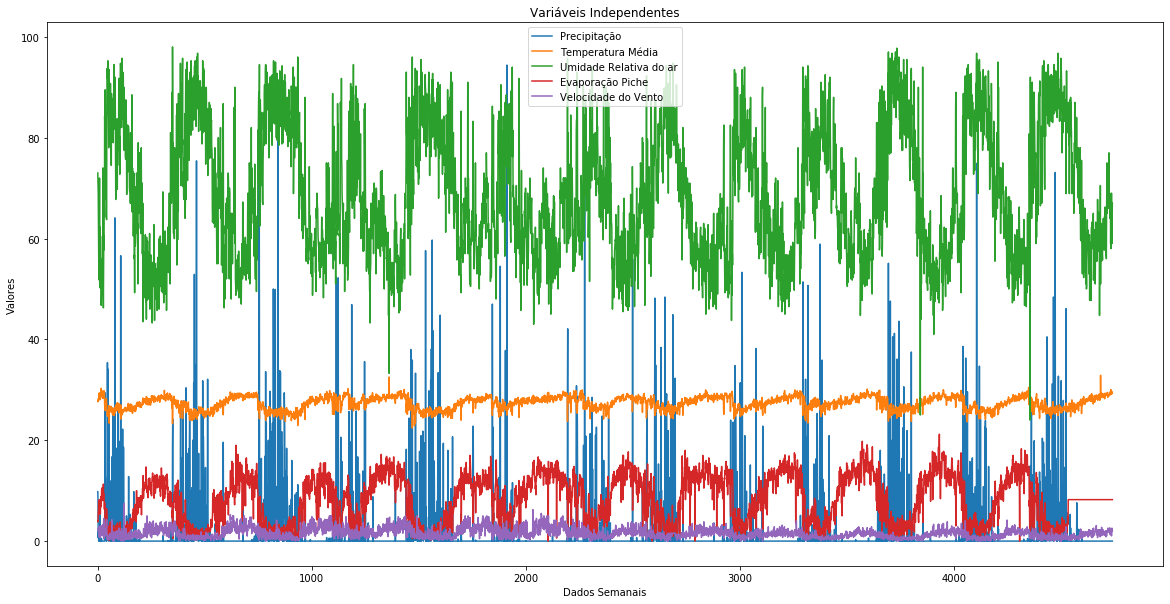

In [28]:

plt.figure(figsize=(20,10))
data.Precipitacao.plot(label="Precipitação")
data.TempMedia.plot( label="Temperatura Média")
data.Umidade.plot( label="Umidade Relativa do ar")
data.Evaporacao.plot( label="Evaporação Piche")
data.VelVento.plot( label="Velocidade do Vento")
plt.title("Variáveis Independentes")
plt.legend()
plt.xlabel('Dados Semanais')
plt.ylabel('Valores')

plt.show()

### Verifica Nulos da variável dependente - N. de infectados.

In [68]:
tot_nulos=data2.isnull().sum()
tot_nulos

data          0
Infectados    0
Semana        0
Ano           0
dtype: int64

### Agrupar  por semana e plota o gráfico da variável dependente

In [69]:
data2Semana = data2.groupby(by=['Ano','Semana'], as_index=False).sum()
for col_name in data2Semana:
    print(col_name)
data2Semana.to_csv('./Infectados_Semanal.csv')

Ano
Semana
Infectados


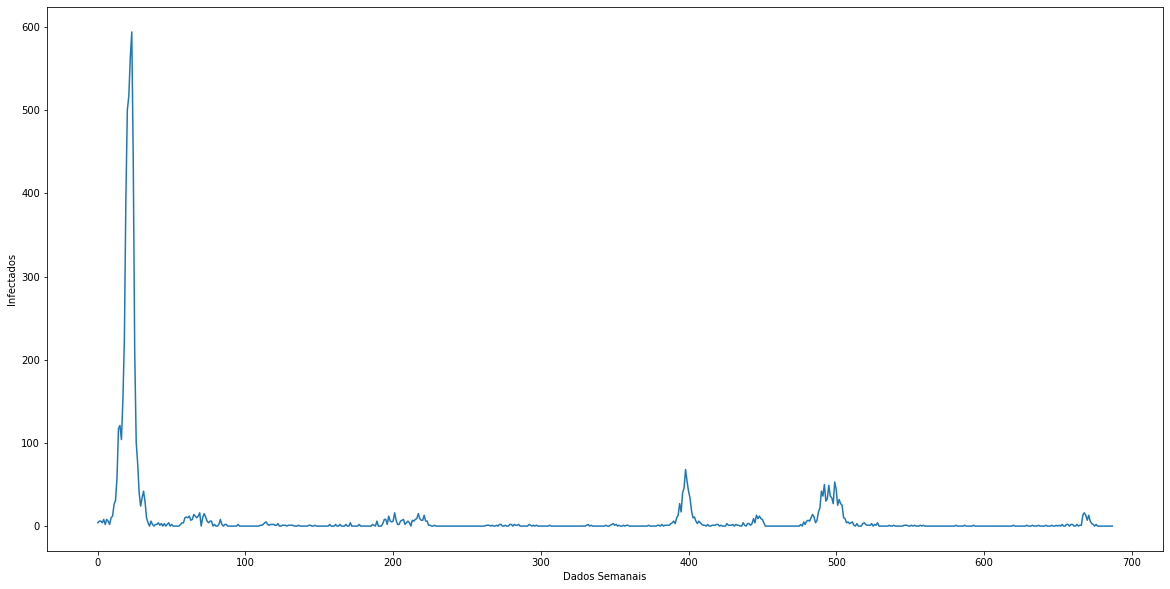

In [31]:
# Analisar dados de "Infectados" ao longo do tempo
plt.figure(figsize=(20,10))
plt.xlabel('Dados Semanais')
plt.ylabel('Infectados')
plt.plot(data2Semana['Infectados'])
plt.show()

### Verifica-se um outlier  em 2007 - Vamos excluir

In [32]:
data2Semana=data2Semana.iloc[53:,:]
data2Semana.reset_index(inplace = True, drop = True)
data2Semana

,Ano,Semana,Infectados
0,2008,1,0
1,2008,2,0
2,2008,3,0
3,2008,4,2
4,2008,5,4
...,...,...,...
630,2019,48,0
631,2019,49,0
632,2019,50,0
633,2019,51,0


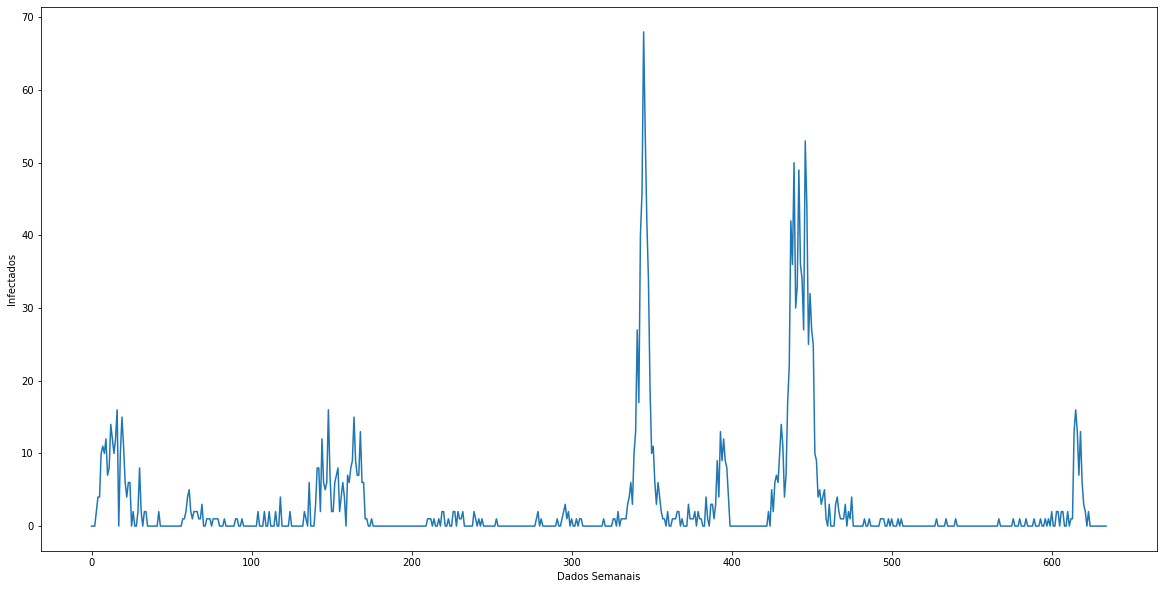

In [33]:
# Analisar dados de "Infectados" ao longo do tempo
plt.figure(figsize=(20,10))
plt.xlabel('Dados Semanais')
plt.ylabel('Infectados')
plt.plot(data2Semana['Infectados'])
plt.show()

### Excluir também  ano de 2007 dos atributos

In [34]:
dataSemana=dataSemana.iloc[53:,:]
dataSemana.reset_index(inplace = True, drop = True)
dataSemana

,Ano,Semana,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento
0,2008,1,15.7,169.8,116.0,28.8,33.300000,137.26,344.75,9.800000
1,2008,2,5.6,248.1,155.3,53.0,62.300000,192.60,475.25,8.866666
2,2008,3,20.3,226.3,161.9,27.7,32.900000,184.80,584.75,8.833333
3,2008,4,56.8,221.9,159.4,34.1,36.700000,182.88,582.75,6.200001
4,2008,5,38.4,224.4,161.2,41.4,27.300000,185.16,591.75,6.133333
...,...,...,...,...,...,...,...,...,...,...
630,2019,48,0.0,263.3,160.9,70.0,57.551636,203.08,419.50,10.974720
631,2019,49,0.0,263.5,162.4,70.6,57.551636,202.82,485.00,13.118220
632,2019,50,0.0,258.2,167.3,54.4,57.551636,202.42,500.00,14.661540
633,2019,51,0.0,261.6,163.6,59.0,57.551636,205.48,455.00,13.889880


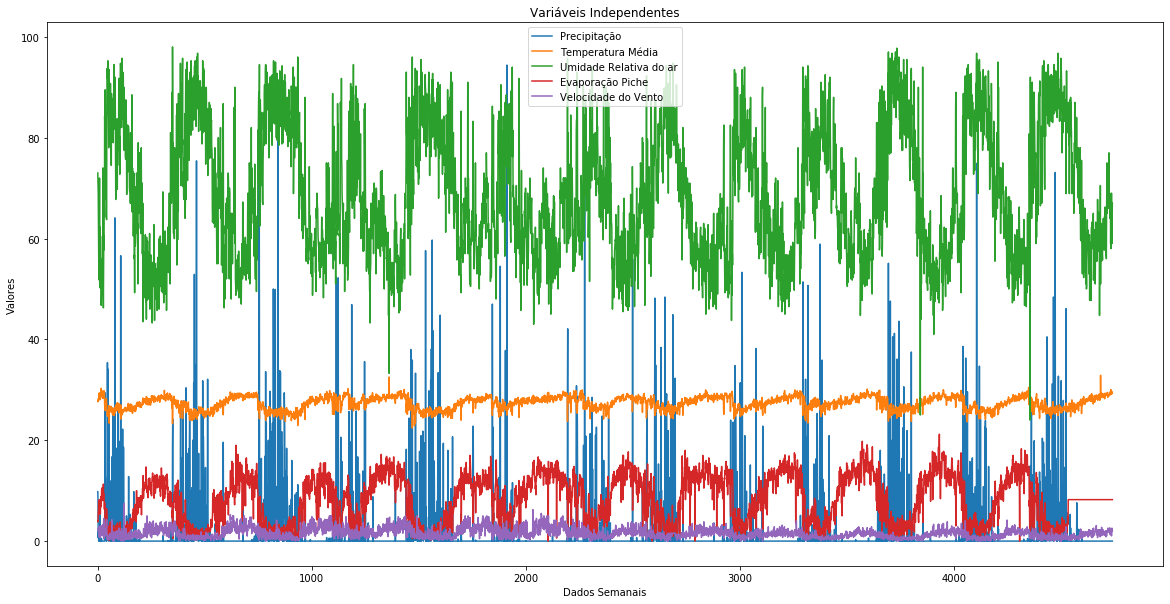

In [35]:
plt.figure(figsize=(20,10))
data.Precipitacao.plot(label="Precipitação")
data.TempMedia.plot( label="Temperatura Média")
data.Umidade.plot( label="Umidade Relativa do ar")
data.Evaporacao.plot( label="Evaporação Piche")
data.VelVento.plot( label="Velocidade do Vento")
plt.title("Variáveis Independentes")
plt.legend()
plt.xlabel('Dados Semanais')
plt.ylabel('Valores')

plt.show()

### Separando dados para treino e teste

In [36]:
X_train=dataSemana.iloc[0:530]
X_test=dataSemana.iloc[531:634]
y_train = data2Semana.iloc[0:530]
submission = data2Semana.iloc[531:634]

X_train,X_test,y_train

(      Ano  Semana  Precipitacao  TempMaxima  TempMinima  Insolacao  \
 0    2008       1          15.7       169.8       116.0       28.8   
 1    2008       2           5.6       248.1       155.3       53.0   
 2    2008       3          20.3       226.3       161.9       27.7   
 3    2008       4          56.8       221.9       159.4       34.1   
 4    2008       5          38.4       224.4       161.2       41.4   
 ..    ...     ...           ...         ...         ...        ...   
 525  2017      49           0.0       262.8       157.3       67.3   
 526  2017      50           0.0       258.9       158.7       56.9   
 527  2017      51           0.0       241.9       163.0       26.5   
 528  2017      52           1.6       258.4       165.1       48.8   
 529  2017      53           0.0        37.7        23.7       10.2   
 
      Evaporacao  TempMedia     Umidade   VelVento  
 0          33.3     137.26  344.750000   9.800000  
 1          62.3     192.60  475.250000 

### Normalizador estatístico, onde o resultado da normalização garante média zero e variância/desvio parão unitária.

In [37]:
normalizador = StandardScaler()

X_train.iloc[:,2:] = normalizador.fit_transform(X_train.iloc[:,2:])
X_test.iloc[:,2:] = normalizador.transform(X_test.iloc[:,2:])
X_train,X_test,y_train

(      Ano  Semana  Precipitacao  TempMaxima  TempMinima  Insolacao  \
 0    2008       1     -0.009070   -2.493929   -2.351896  -1.806072   
 1    2008       2     -0.363709    0.325895    0.172574  -0.074990   
 2    2008       3      0.152449   -0.459190    0.596531  -1.884757   
 3    2008       4      1.434065   -0.617647    0.435941  -1.426950   
 4    2008       5      0.787990   -0.527615    0.551566  -0.904765   
 ..    ...     ...           ...         ...         ...        ...   
 525  2017      49     -0.560340    0.855287    0.301046   0.947922   
 526  2017      50     -0.560340    0.714836    0.390976   0.203986   
 527  2017      51     -0.560340    0.102614    0.667190  -1.970596   
 528  2017      52     -0.504160    0.696830    0.802086  -0.375426   
 529  2017      53     -0.560340   -7.251256   -8.280866  -3.136573   
 
      Evaporacao  TempMedia   Umidade  VelVento  
 0     -0.826646  -2.644551 -1.404554 -0.216320  
 1      0.107490   0.191294  0.044278 -0.37894

Nossa variável de destino, "Infectados" é um número inteiro não negativo, o que significa que estamos procurando fazer algumas previsões de contagem. As técnicas de regressão padrão para esse tipo de previsão incluem:
Regressão de Poisson
Regressão binomial negativa.

Qual técnica terá melhor desempenho depende de muitas coisas, mas a escolha entre a regressão de Poisson e a regressão binomial negativa é bastante direta.

A regressão de Poisson se ajusta de acordo com a suposição de que a média e a variância da distribuição da população são iguais. Quando não são, especificamente quando a variação é muito maior que a média, a abordagem binomial negativa é melhor.

A regressão binomial negativa simplesmente levanta a suposição de que a média e variância da população são iguais, permitindo uma classe maior de modelos possíveis. De fato, dessa perspectiva, a distribuição de Poisson é apenas um caso especial da distribuição binomial negativa.

In [38]:
print('Media e Variancia dos Infectados')
print('mean: ', y_train.mean()[2])
print('var :', y_train.var()[2])

Media e Variancia dos Infectados
mean:  3.3981132075471696
var : 71.12476013838857


Variancia maior que media sugere que a variável "Infectados" pode ser descrita por uma distribuição binomial negativa; portanto, usaremos uma regressão binomial negativa abaixo. 

Vamos analisar as Correlações


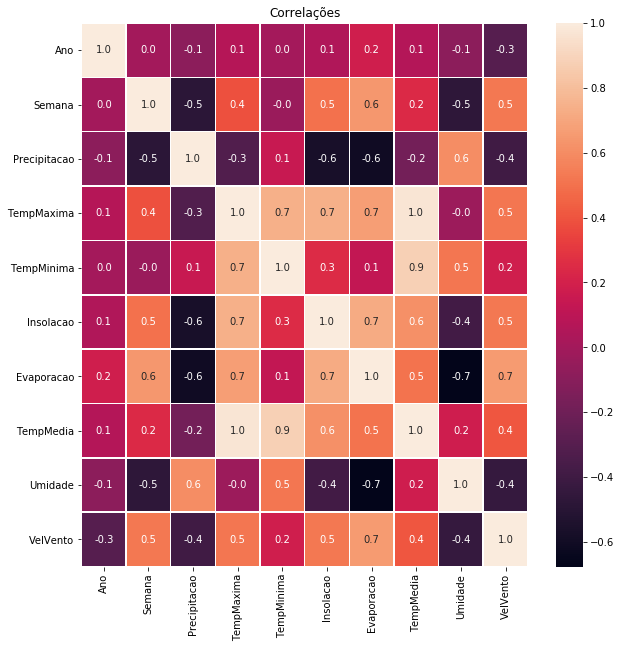

In [39]:
#X_train['Infectados'] = y_train['Infectados']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlações')
plt.show()


### Verifica-se que TempMaxima e TemMinima estão fortemente relacionada com TempMedia, sugerindo que podemos excluir estes 2  atributos.

In [40]:
delete = ['TempMinima','TempMaxima']
for z in delete:
    del X_train[z]
    del X_test[z]

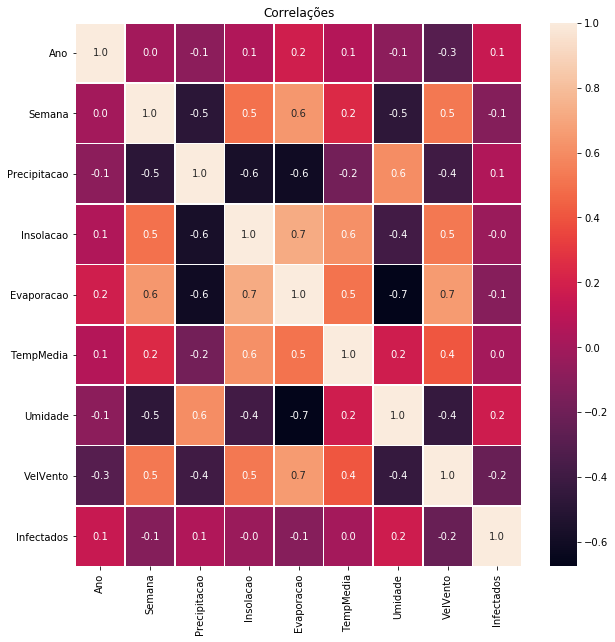

In [41]:
X_train['Infectados'] = y_train['Infectados']

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlações')
plt.show()

### Vamos verificar a correlação dos atributos com a variável dependente

Text(0.5, 1.0, 'Correlações')

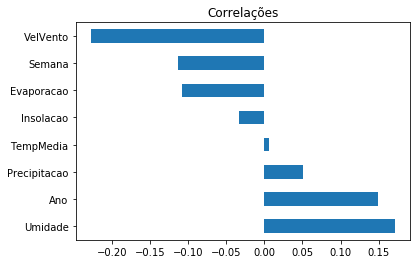

In [42]:
correlations = X_train.corr()
(correlations['Infectados'].drop('Infectados').sort_values(ascending=False).plot.barh())
plt.title('Correlações')

### Verificamos que Vel. Vento, Umidade e Evaporação estão mais fortemente correlacionadas com Infectados do que a precipitação. Isto foi uma surpresa

### Vamos plotar o número de infectados para cada ano

Text(0, 0.5, 'Total de Infectados')

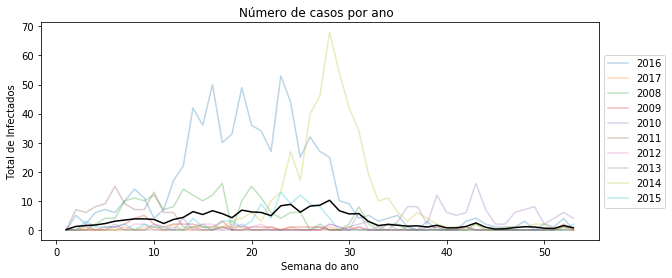

In [43]:
#Numero de Casos por semana
for i in set(y_train['Ano']):
    df = y_train[y_train['Ano'] == i]
    df.set_index('Semana', drop = True, inplace = True)
    plt.plot(df['Infectados'], alpha = .3)
    
y_train.groupby('Semana')['Infectados'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(y_train['Ano']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Número de casos por ano  ')
plt.xlabel('Semana do ano')
plt.ylabel('Total de Infectados')

###  Verificas uma incidência maior de dengue no final do primeiro semestre, que coincide com o final do período chuvoso no Ceará

## Construindo modelos de Machine Learning
### Agora que temos uma compreensão mais clara do nosso conjunto de dados, continuaremos a construir nossos modelos de ML.


In [44]:
#features=['Infectados','Precipitacao','Insolacao','Evaporacao','TempMedia','Umidade','VelVento'] 
features=['Infectados','Precipitacao','Insolacao','Evaporacao','Umidade','VelVento'] 

X_train=X_train.join(X_train.groupby(['Semana'])['Infectados'].mean(), on=['Semana'], rsuffix='_avg')
X_test=X_test.join(X_train.groupby(['Semana'])['Infectados'].mean(), on=['Semana'], rsuffix='_avg')

#TRAIN
X= X_train[features]
Y = X_train['Infectados']

#TEST
Xt= X_test[features]
X.fillna(method='bfill', inplace=True)
Xt.fillna(method='bfill', inplace=True)


## Criando os modelos e treinando 

### SVM - (Support Vetor Machine / SRV - Support vetor Regression)

In [45]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
t0 = time.time()
svr.fit(X,Y)

svr_fit = time.time() - t0
print("Complexidade SVR e largura de banda selecionadas e modelo ajustado em %.3f s"
      % svr_fit)
model=svr.best_estimator_
print(model)


Complexidade SVR e largura de banda selecionadas e modelo ajustado em 2.790 s
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


###   KNN (k-nearest neighbors )

In [46]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X,Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

### Regressão Logística

In [47]:
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Separa dados de treino (70%)  e teste (30%) Para VALIDAÇÃO

In [48]:
train_subtrain = X_train.sample(frac=0.7)
train_subtest = X_train.loc[~X_train.index.isin(train_subtrain.index)]

train_subtrain.fillna(method='bfill', inplace=True)
train_subtest.fillna(method='bfill', inplace=True)

#X_train.describe()
train_subtest.describe()


,Ano,Semana,Precipitacao,Insolacao,Evaporacao,TempMedia,Umidade,VelVento,Infectados,Infectados_avg
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2012.628931,26.446541,-0.123816,0.110055,0.116761,0.002446,-0.147790,0.091955,2.553459,3.263522
std,2.743354,15.878753,0.839357,0.959442,0.948237,1.163852,0.990922,1.070789,6.299134,2.561285
min,2008.000000,1.000000,-0.560340,-3.587226,-1.657705,-8.173783,-4.593649,-1.650868,0.000000,0.100000
25%,2010.000000,12.000000,-0.560340,-0.393309,-0.783161,-0.153578,-0.770343,-0.721606,0.000000,1.200000
50%,2013.000000,27.000000,-0.539272,0.225446,0.303980,0.290708,-0.258256,-0.100162,0.000000,2.400000
75%,2015.000000,40.000000,-0.077540,0.890696,0.909558,0.503883,0.613263,0.678094,1.500000,5.500000
max,2017.000000,53.000000,4.225530,1.513027,1.682636,0.795974,1.765112,3.433936,36.000000,10.200000


### Cria Predições

In [49]:
preds= model.predict(train_subtest[features]).astype(int)
#SVR
#add to the dataframes
train_subtest['fitted'] = preds

# KNN
preds2 = knn.predict(train_subtest[features]).astype(int)
train_subtest['fitted2'] = preds2
#train_subtest.index = train_subtest['week_start_date']

# Logistic regression
preds3 = logreg.predict(train_subtest[features]).astype(int)
train_subtest['fitted3'] = preds3
#train_subtest.index = train_subtest['week_start_date']


### Plotagem das predições com parte de dados de teste (30%)

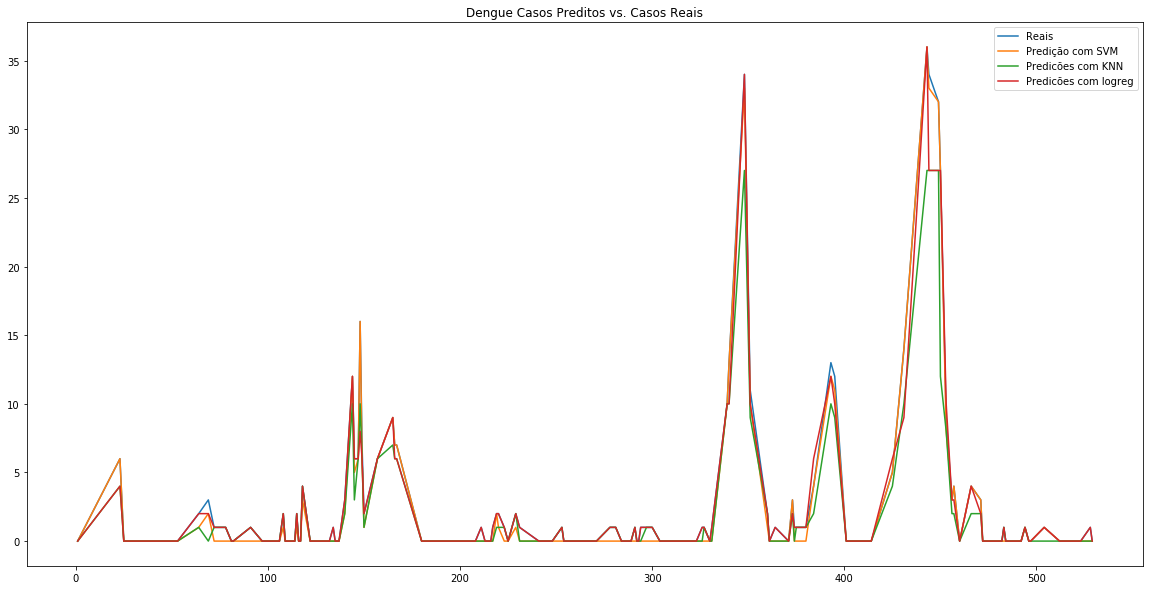

In [50]:

plt.figure(figsize=(20,10))
train_subtest.Infectados.plot(label="Reais")
train_subtest.fitted.plot( label="Predição com SVM")
train_subtest.fitted2.plot( label="Predicões com KNN")
train_subtest.fitted3.plot( label="Predicões com logreg")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()


## Calcula as métricas  - Cross validation com o score R2

### Scores para SVR

In [51]:
scores = cross_val_score(svr, X,Y, cv=5, scoring = "r2")
print("Scores usando SVR:", scores)
print("Média  usando SVR:", scores.mean())

Scores usando SVR: [0.99887003 0.99890908 0.98992785 0.85034509 0.99710479]
Média  usando SVR: 0.9670313701613626


### Scores para KNN

In [52]:
scores = cross_val_score(knn, X,Y, cv=5, scoring = "r2")
print("Scores usando KNN:", scores)
print("Média  usando KNN:", scores.mean())

Scores usando KNN: [0.50518313 0.40141838 0.72342755 0.60402256 0.51173549]
Média  usando KNN: 0.5491574234264782


### Scores para Regressão Logística

In [53]:
scores = cross_val_score(logreg, X,Y, cv=5, scoring = "r2")
print("Scores usando Reg. Logística:", scores)
print("Média usando Reg. Logística:", scores.mean())

Scores usando Reg. Logística: [0.92782631 0.90048303 0.88593443 0.78451362 0.86631273]
Média usando Reg. Logística: 0.8730140240978072


### Podemos afirmar, de acordo com os scores, que SVR e Reg. Logística fornecem bons resultados

## Fazendo predições com dados de teste para cada algoritmo

### Predição KNN

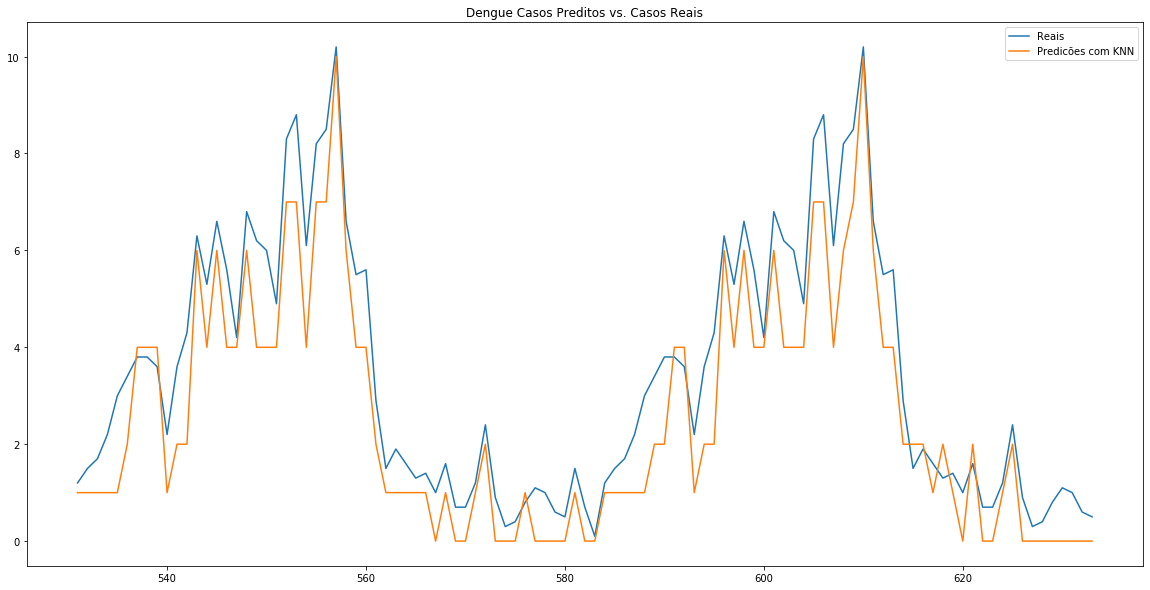

In [54]:
knn.fit(X,Y)
predictions = knn.predict(Xt).astype(int)
submission.Infectados = np.concatenate([predictions])

plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")

submission.Infectados.plot( label="Predicões com KNN")

plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

### Predição SVR

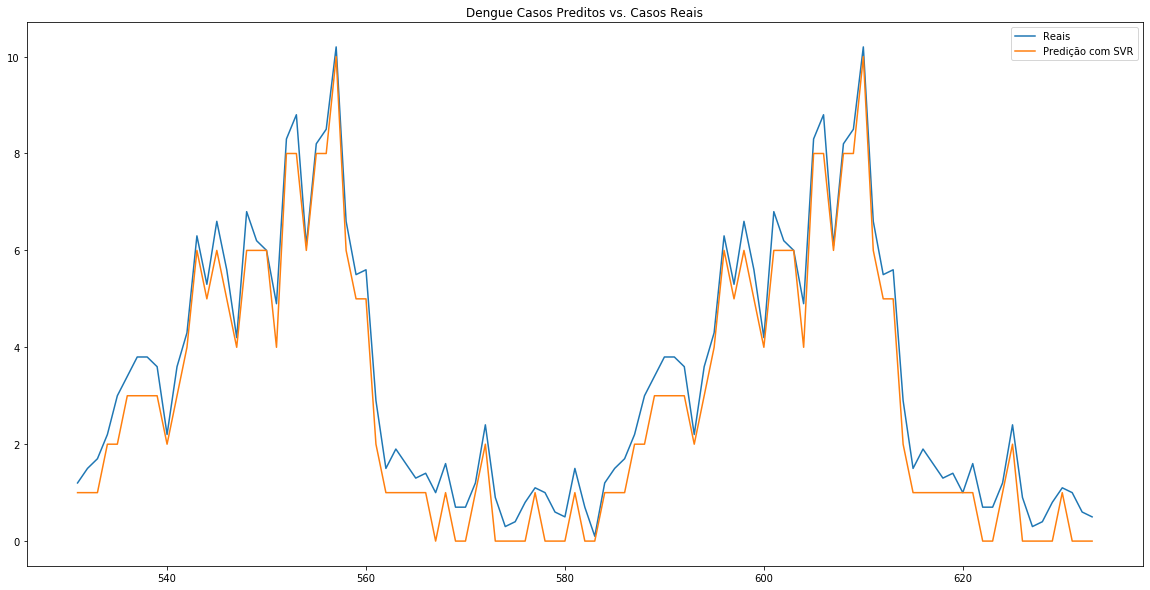

In [55]:
#Predição SVM

model.fit(X,Y)
predictions2 = model.predict(Xt).astype(int)

submission.Infectados = np.concatenate([predictions2])

plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")
submission.Infectados.plot( label="Predição com SVR")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

### Predição Regressão Logística

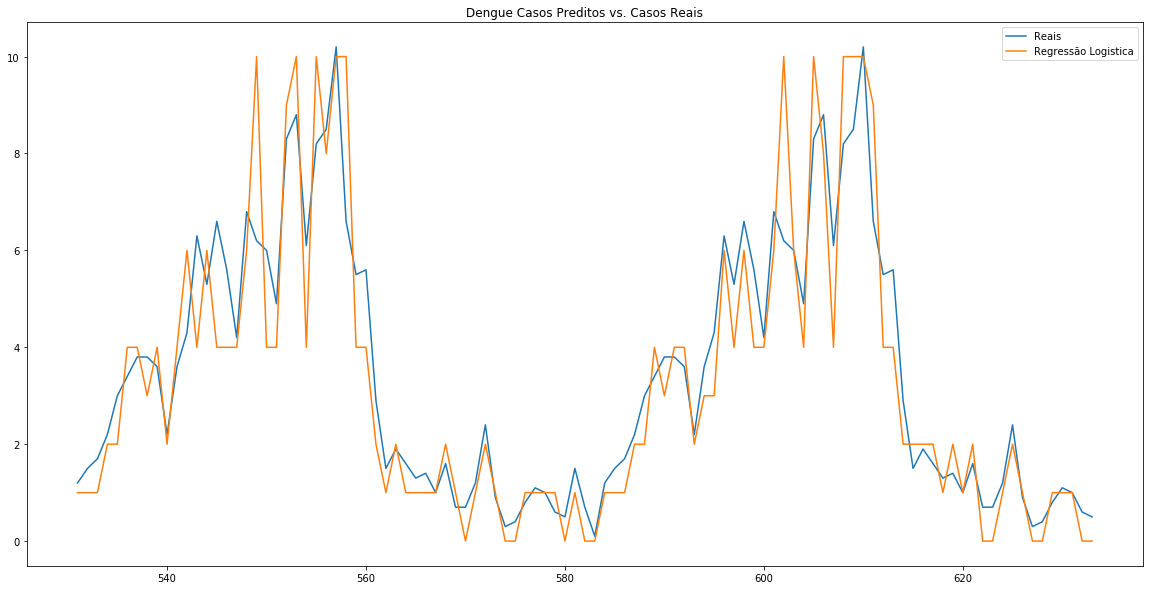

In [56]:

logreg.fit(X,Y)
predictions3 = logreg.predict(Xt).astype(int)

submission.Infectados = np.concatenate([predictions3])


plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")

submission.Infectados.plot( label="Regressão Logistica")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

### Concluimos que o modelo baseado em SVR fornece o melhor ajuste para Predição de Dengue